In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib as mpl
mpl.use('tkagg')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [5]:
seg = pd.read_csv('segmentation data.csv', index_col=0)
seg.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


## Notes on data

ID:  Identifier of each customer

Sex:
     0=male 1=female

Maritual status:
     0=single 1=none single

Age: Age of customer

Education:
     0=other/unknown
     1=high school
     2=university
     3=graduate school

Income: annual income of customer

Occupation:
     0=unemployed
     1=skilled
     2=highly qualified

Settlement size:
     0=small city
     1=mid-size city
     2=big city

## Exploratory Data Analysis (EDA)

In [6]:
# Standard statistical analysis

seg.describe()

# Data has 2000 observations in total
# Data is showing nearly an even split between sinle and non single status of the customers.
# Data shows an average age of 36
# Data shows an average income of 121,000

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [7]:
# Check for null values

seg.isna().sum()

Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [8]:
seg['Marital status'].value_counts()

0    1007
1     993
Name: Marital status, dtype: int64

In [9]:
seg['Sex'].value_counts()

0    1086
1     914
Name: Sex, dtype: int64

In [10]:
1086/2000

#54% of the dataset is male

0.543

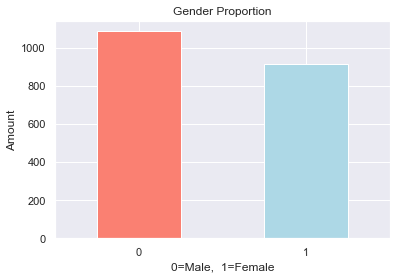

In [11]:
seg['Sex'].value_counts().plot(kind='bar', color=['salmon', 'lightblue'])
plt.title('Gender Proportion')
plt.xlabel('0=Male,  1=Female')
plt.ylabel('Amount')
plt.xticks(rotation=1);

In [12]:
pd.crosstab(seg['Occupation'], seg['Education'])

#A large proprtion of the data contains customers which are skilled (not qualified) with high school education (only)

Education,0,1,2,3
Occupation,,,,
0,92,436,96,9
1,168,796,133,16
2,27,154,62,11


In [13]:
# Analyse single high earners

single_higher_income = seg[(seg['Income'] > 120000) & (seg['Marital status'] == 0)]
single_higher_income.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1
100000006,0,0,35,1,144848,0,0
100000007,0,0,53,1,156495,1,1


In [14]:
single_higher_income['Sex'].value_counts()

0    463
1     27
Name: Sex, dtype: int64

In [15]:
463/490

0.9448979591836735

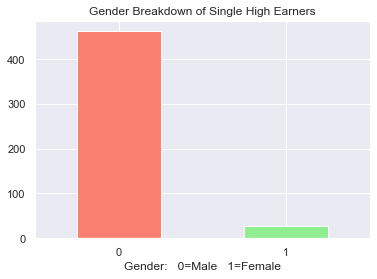

In [16]:
single_higher_income['Sex'].value_counts().plot(kind='bar', color=['Salmon', 'lightgreen'])
plt.title('Gender Breakdown of Single High Earners')
plt.xticks(rotation=1)
plt.xlabel('Gender:   0=Male   1=Female');

In [17]:
# Analyse non single high earners

non_single_higher_income = seg[(seg['Income'] > 120000) & (seg['Marital status'] == 1)]
non_single_higher_income.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000002,1,1,22,1,150773,1,2
100000009,0,1,61,2,151591,0,0
100000010,0,1,28,1,174646,2,0
100000012,1,1,24,1,127596,1,0
100000019,1,1,44,2,261952,2,2


In [18]:
non_single_higher_income['Sex'].value_counts()

1    288
0    119
Name: Sex, dtype: int64

In [19]:
288/407

0.7076167076167076

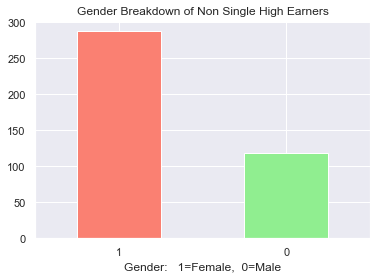

In [20]:
non_single_higher_income['Sex'].value_counts().plot(kind='bar', color=['Salmon', 'lightgreen'])
plt.title('Gender Breakdown of Non Single High Earners')
plt.xticks(rotation=1)
plt.xlabel('Gender:   1=Female,  0=Male');

In [21]:
#The data shows that men have high income when single and woman have high income when not single.

In [22]:
pd.crosstab(single_higher_income['Settlement size'], single_higher_income['Sex'])

Sex,0,1
Settlement size,,
0,71,20
1,177,7
2,215,0


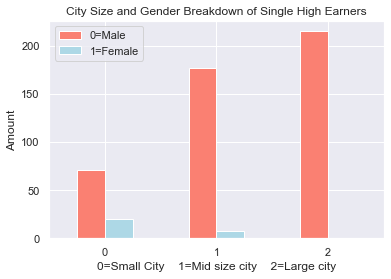

In [23]:
#Analyse further the single high earners

pd.crosstab(single_higher_income['Settlement size'], single_higher_income['Sex']).plot(kind='bar', color=['salmon', 'lightblue'])
plt.xticks(rotation=1)
plt.xlabel('0=Small City    1=Mid size city    2=Large city')
plt.ylabel('Amount')
plt.legend(['0=Male',  '1=Female'])
plt.title('City Size and Gender Breakdown of Single High Earners');

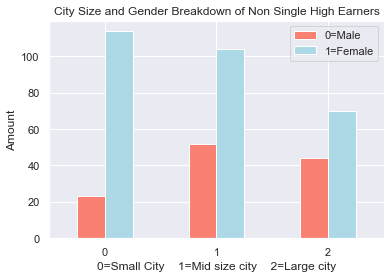

In [24]:
#Analyse further the non single high earners

pd.crosstab(non_single_higher_income['Settlement size'], non_single_higher_income['Sex']).plot(kind='bar', color=['salmon', 'lightblue'])
plt.xticks(rotation=1)
plt.xlabel('0=Small City    1=Mid size city    2=Large city')
plt.ylabel('Amount')
plt.legend(['0=Male',  '1=Female'])
plt.title('City Size and Gender Breakdown of Non Single High Earners');

In [25]:
# Analyse how the columns correlate (dependancies) to one another

corr_matrix = seg.corr()
corr_matrix

# A strong positive correlation between 'Age' and 'Education' where the older the customer, the more educated.
# A strong positive correlation between 'Occupation' and 'Income' where the more highly skilled the more higher the salary.

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


<Figure size 864x432 with 0 Axes>

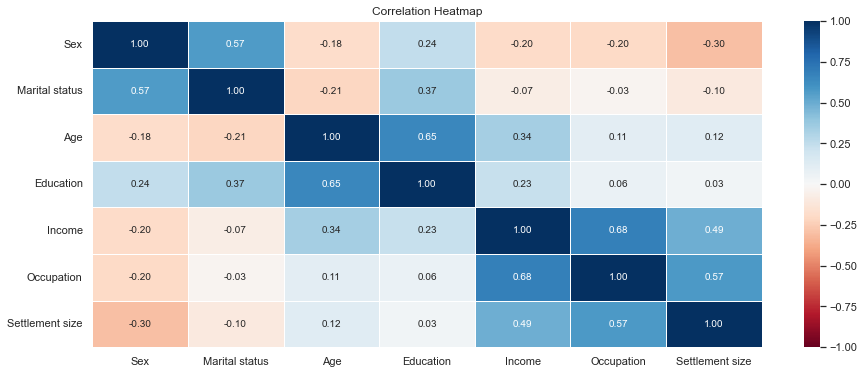

In [26]:
plt.figure(figsize = (12, 6))

fig, ax = plt.subplots(figsize=(15,6))
ax = sns.heatmap(corr_matrix, annot =True, cmap='RdBu', linewidths=0.5, fmt='.2f', vmin= -1, vmax=1)
plt.title('Correlation Heatmap');

# Additional positive correlations are 'Occupation' and 'Settlement size'

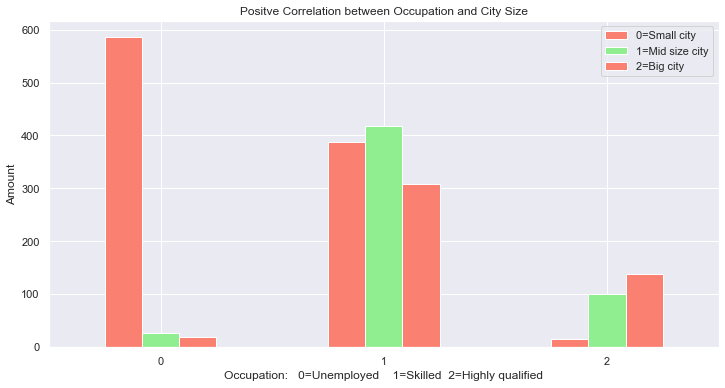

In [27]:
pd.crosstab(seg['Occupation'], seg['Settlement size']).plot(kind='bar', figsize=(12,6), color=['salmon', 'lightgreen'])
plt.xticks(rotation=1)
plt.xlabel('Occupation:   0=Unemployed    1=Skilled  2=Highly qualified')
plt.ylabel('Amount')
plt.legend(['0=Small city', '1=Mid size city', '2=Big city'])
plt.title('Positve Correlation between Occupation and City Size');

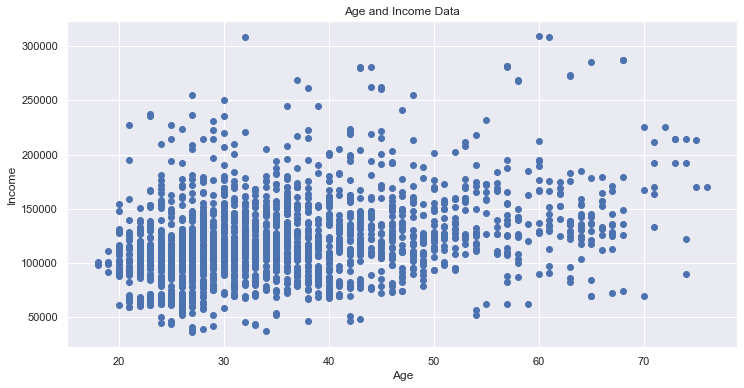

In [28]:
# Analyse negative correlated columns, 'Age' and 'Income'

plt.figure(figsize = (12, 6))

plt.scatter(seg.iloc[:, 2], seg.iloc[:,4])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Age and Income Data');

## Patterns in the dataset

The dataset has 2000 observations in total.

54% of the dataset is male.

The dataset shows an average age of 36.

The dataset shows an average income of 121,000.

A large proprtion of the dataset contains customers which are skilled (not qualified) with high school education (only).

There is almost an equal split of single and non single customers.

The dataset shows a significant proportion of unemployed customers from small cities.

There is a positive correlation between the 'Age' and 'Education' column.

There is a positive correlation between the 'Occupation' and 'Income' column.

There is a positive correlation between the 'Occupation' and 'Settlement size' column.

490 customers are single high earners where they earn above the average income of 120,000. 94% of these customers are male
and from large cities.

407 customers are non single high earners where they earn above the average income of 120,000. 71% of these customers are 
female and from small cities.

In [30]:
## Standardising the data

scaler = StandardScaler()

seg_std = scaler.fit_transform(seg)

## K-Means Clustering

In [33]:
# Determining the number of clusters

km = []
for i in range(1, 11):  # Run the code with 10 iterations
    kmeans = KMeans(n_clusters = i,  init='k-means++', random_state = 42)
    kmeans.fit(seg_std)
    km.append(kmeans.inertia_)

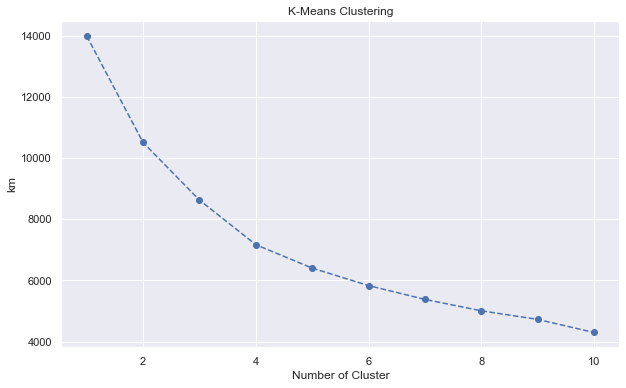

In [36]:
# Plot the results

plt.figure(figsize=(10,6))

plt.plot(range(1, 11), km, marker= 'o', linestyle = '--')
plt.xlabel('Number of Cluster')
plt.ylabel('km')
plt.title('K-Means Clustering');

# The graph states that the number of clusters within the dataset is 4.

In [40]:
# Implementing the K_Means model with 4 clusters

kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
kmeans.fit(seg_std)

KMeans(n_clusters=4, random_state=42)

### Analyse The Results

In [47]:
# Make a copy of the original dataset

df_seg_kmeans = seg.copy()   

# Add a column which will contain the predicted clusters for each observation. Extract with 'kmeans.labels'.

df_seg_kmeans['Segment K-Means'] = kmeans.labels_  

In [49]:
# Group the dataset by the 4 clusters

df_seg_analysis = df_seg_kmeans.groupby(['Segment K-Means']).mean()
df_seg_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-Means,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
2,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695
3,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807


Interpret the clusters

1st cluster ('Well-off'): 
    Contains almost an equal split of men and woman with an average age of 56, This is the 'oldest' segement out of the
    clusters. The customers have a high level of education aswell as the highest average income. Over two thirds of the
    customers are in relationships.
    
2nd cluster ('Fewer Opportunities'):
    Almost all customers are single and just over a third are men. Their average age is 36 and thir education level is low compared to other segments.
    They leave almost exclusively in small citites and they have the lowest income. 
    
3rd cluster ('Standard'):  
    These are customers in relationships with an average age of 29. This is the youngest segment. They have a meduim
    level of education, income and middle management jobs. They equally distributed between small, medium and big cities.
    About 85% are woman.
    
4th cluster ('Carerr Focussed'):
    Contains mostly men at the average age of 35. Less than 20% are in relationships. Thet have a low level education
    and high values for income and occupation. The majority live in big and middle size cities.  
                                                                                                 

In [56]:
# Analyse the number of observations per clusters (size of each cluster)

df_seg_analysis['No. of Observations'] = df_seg_kmeans[['Segment K-Means', 'Sex']].groupby(['Segment K-Means']).count()

In [64]:
# Analyse the proportions of the clusters compared to the entire dataset

df_seg_analysis['Proportions of Obs %'] = df_seg_analysis['No. of Observations'] / df_seg_analysis['No. of Observations'].sum()

In [65]:
df_seg_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,No. of Observations,Proportions of Obs,Proportions of Obs %
Segment K-Means,,,,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315,0.1315
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310,0.2310
2,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525,0.3525
3,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850,0.2850


In [75]:
# Name the segements

df_seg_analysis.rename({0: 'Well-off',
                        1: 'Fewer-Opportunities',
                        2: 'Standard',
                        3: 'Career Focussed'})


,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,No. of Observations,Proportions of Obs %
Segment K-Means,,,,,,,,,
Well-off,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
Fewer-Opportunities,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
Standard,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525
Career Focussed,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850


Well-off: With only 263 observations and 13% of the dataset, this cluster is the smallest out of the four.

Standard: With 705 observations and 35% of the dataset, this cluster is the largest out of the four.   

In [81]:
 # Add the cluster names to the non standardised copied dataset 
    
df_seg_kmeans['Labels'] = df_seg_kmeans['Segment K-Means'].map({0: 'Well-off',
                                                                1: 'Fewer-Opportunities',
                                                                2: 'Standard',
                                                                3: 'Career Focussed'})

C:\Users\gail_\Documents\Customer-Analytics\.env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


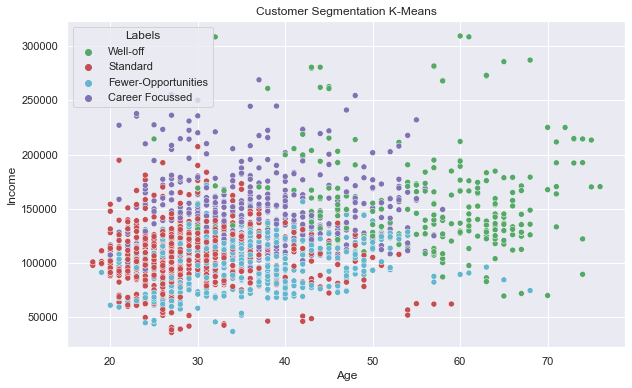

In [82]:
# Visualise each cluster

plt.figure(figsize=(10,6))

x_axis = df_seg_kmeans['Age']
y_axis = df_seg_kmeans['Income']

sns.scatterplot(x_axis, y_axis, hue = df_seg_kmeans['Labels'], palette = ['g', 'r', 'c', 'm'])
plt.title('Customer Segmentation K-Means');


## K-Means Clustering Combined With Principal Component Analysis (PCA)

In [88]:
# Dimension Reduction

pca = PCA()

pca.fit(seg_std)

PCA()

In [89]:
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])